<a href="https://colab.research.google.com/github/aaltmets/Masterthesis/blob/main/bot_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# use formula friends/(followers **2) 

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
#read file 
df = pd.read_csv('file_name.csv')

In [ ]:
df['author_id'] = df['author_id'].astype(int)

In [ ]:
df['tweet_id'] = df['tweet_id'].astype(int)

In [ ]:
df['followers'] = df['followers']+1

In [ ]:
df['friends_ratio'] = df['following'] / (df['followers'] ** 2)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

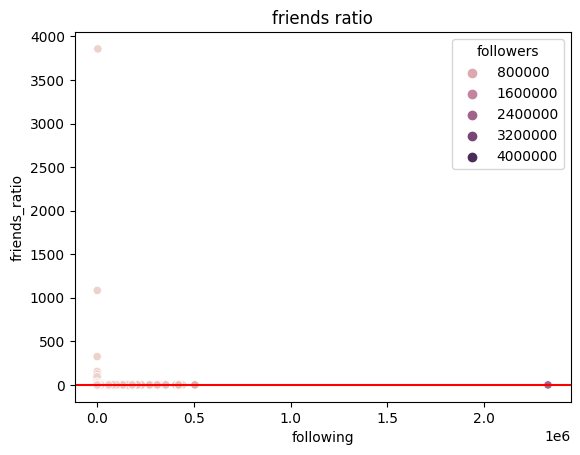

In [ ]:
sns.scatterplot(data=df, x='following', y='friends_ratio', hue='followers')
plt.title('friends ratio')
plt.axhline(y=0.100, color='r', linestyle='-')
plt.show()

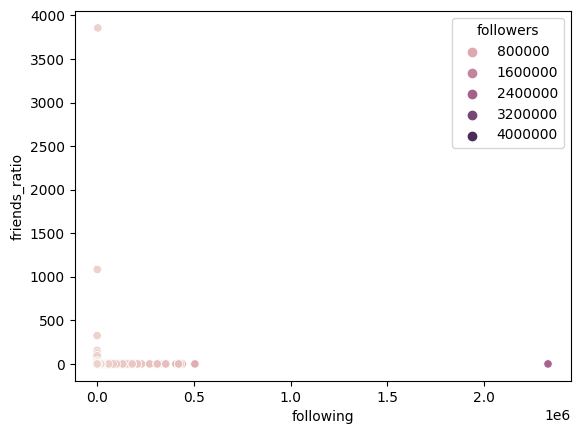

In [ ]:

ax= sns.scatterplot(data=df, x='following', y='friends_ratio', hue='followers')


plt.show()

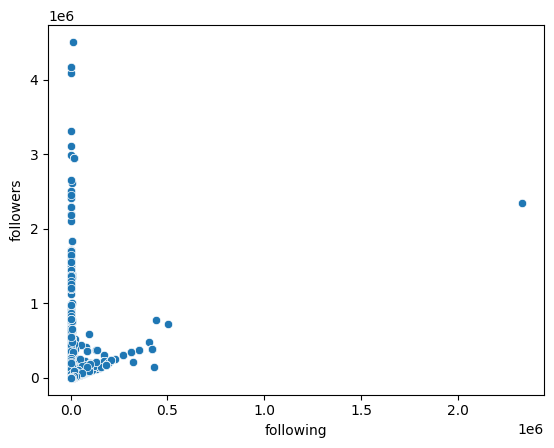

In [ ]:
ax= sns.scatterplot(data=df, x='following', y='followers')


plt.show()

In [ ]:
high_friends_ratio = df[df['friends_ratio'] >= 100]

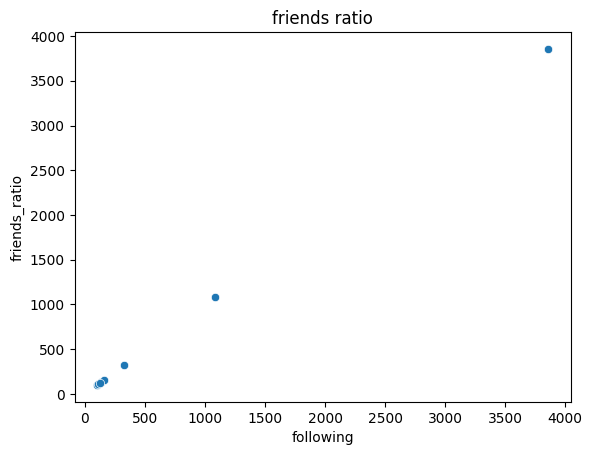

In [ ]:
sns.scatterplot(data=high_friends_ratio, x='following', y='friends_ratio')
plt.title('friends ratio')

plt.show()

In [ ]:
medium = df[df['friends_ratio'] >= 50]

In [ ]:
medium.shape

(53, 23)

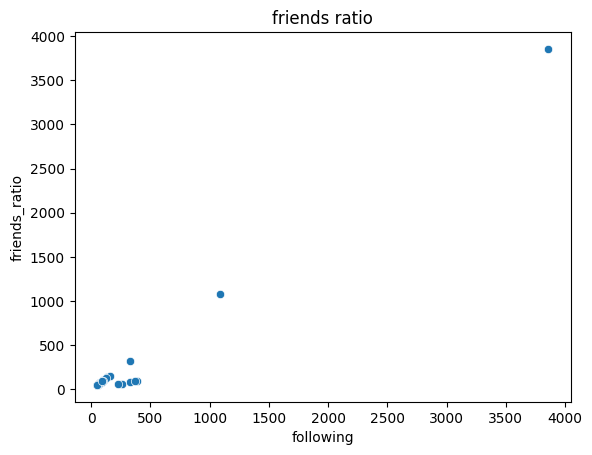

In [ ]:
sns.scatterplot(data=medium, x='following', y='friends_ratio')
plt.title('friends ratio')

plt.show()

In [ ]:
followers = df[df['friends_ratio'] == 0]

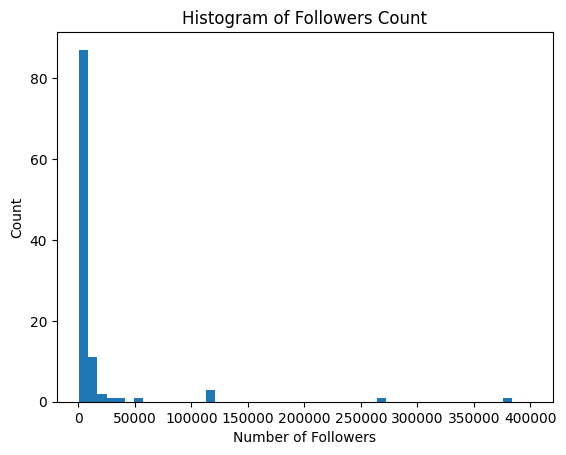

In [ ]:
plt.hist(followers['followers'], bins = 50, range=(1000, 400000))

plt.xlabel("Number of Followers")
plt.ylabel("Count")
plt.title("Histogram of Followers Count")


plt.savefig("histogram.png", dpi=100)
plt.show()

In [ ]:
high_followers = followers[followers['followers'] >= 1000 ]

In [ ]:
high_followers['verified'].value_counts()

False    73
True     10
FALSE     9
0         9
TRUE      6
1         1
Name: verified, dtype: int64

In [ ]:
high_followers_1

In [ ]:
high_friends_ratio

In [ ]:
top_scores = df.sort_values('friends_ratio', ascending=False)

In [ ]:
import numpy as np
top_scores = top_scores[~top_scores.isin([np.inf, -np.inf]).any(axis=1)]
top_scores = top_scores.loc[:, ~top_scores.isin([np.inf, -np.inf]).any()]

In [ ]:
df['includes_bot'] = df['name'].str.endswith('Bot')

In [ ]:
bot_users = df[df['includes_bot'] == True]

In [ ]:
df['includes_bot_desc'] = df['author_description'].str.contains('bot ')

In [ ]:
bot_users_desc = df[df['includes_bot_desc'] == True]

In [ ]:
pd.set_option('display.max_colwidth', None)
bot_users_desc.shape

(35, 25)

In [ ]:
df['retweets'].fillna(0, inplace=True)
df['retweets'] = df['retweets'].astype(int)

In [ ]:
df['retweet_ratio'] = df['retweets'] / df['author_tweets'] *100

In [ ]:
filtered_df = df[df['retweet_ratio'] >= 90]

In [ ]:
df['replies'].fillna(0, inplace=True)
df['replies'] = df['replies'].astype(int)

In [ ]:
df['likes'].fillna(0, inplace=True)
df['likes'] = df['likes'].astype(int)

In [ ]:
df['quote_count'].fillna(0, inplace=True)
df['quote_count'] = df['quote_count'].astype(int)

In [ ]:
df['default_image'] = df['profile_image_url'].str.contains('https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png')


In [ ]:
default_iamge = df[df['default_image'] == True]

In [ ]:
default_iamge.shape

(1636, 27)

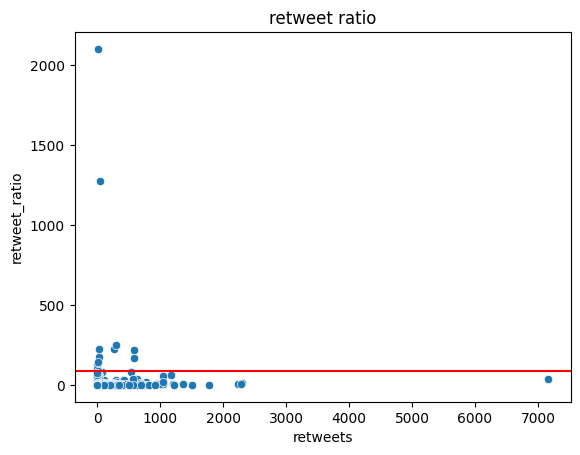

In [ ]:
sns.scatterplot(data=df, x='retweets', y='retweet_ratio')
plt.title('retweet ratio')
plt.axhline(y=90, color='r', linestyle='-')
plt.savefig("retweets.png")
plt.show()

In [ ]:
df['num_words'] = df['name'].apply(lambda x: len(str(x).split()))

In [ ]:
retweet = df[df['retweets'] > 7000]

In [ ]:
one_name = df[df['num_words'] == 1]

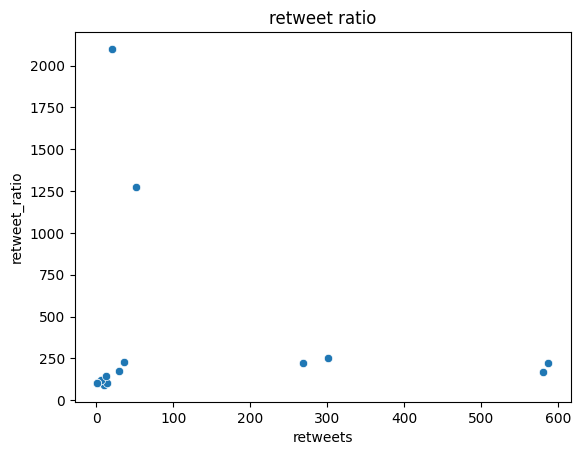

In [ ]:
sns.scatterplot(data=filtered_df, x='retweets', y='retweet_ratio')
plt.title('retweet ratio')
plt.show()

In [ ]:
filtered_df['default_image'] = filtered_df['profile_image_url'].str.contains('https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png')

<ipython-input-51-c47e46b23f9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['default_image'] = filtered_df['profile_image_url'].str.contains('https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png')


In [ ]:
high_friends_ratio = df[df['friends_ratio'] >= 100]

In [ ]:
df_bots = df[df['includes_bot_desc'] == True]

In [ ]:
df_suspi = df[(df['verified'] == False) 
& (df['followers']==1) & (df['following']==0) & (df['author_tweets'] >= 10)]

In [ ]:
import re

def has_numbers(s):
    return bool(re.search(r'\d', str(s)))


In [ ]:
df['has_numbers'] = df['name'].apply(has_numbers)


In [ ]:
has_numbers = df[(df['has_numbers']==True) & (df['default_image'] == True) & (df['likes'] == 0) & (df['author_tweets']>500)]

In [ ]:
has_numbers.shape

(39, 29)

In [ ]:
def remove_bots (df):
  if df['friends_ratio'] > 100:
    return 'bot'
  elif df['retweet_ratio'] > 90 and df['retweets'] >= 50:
    return 'bot'
  elif df['includes_bot'] == True:
    return 'bot'
  elif df['retweet_ratio'] > 90 and df['author_created_at'] > '2022-01-09 03:49:23+00:00':
    return 'bot'
  elif df['friends_ratio'] == 0 and df['verified']!= True and df['verified']!= 1 and df['default_image'] == True:
    return 'bot'
  elif (df['verified'] == False) and (df['followers']==1) and (df['following']==0) and (df['author_tweets'] >= 10):
    return 'bot'
  elif (df['has_numbers']==True) & (df['default_image'] == True) & (df['likes'] == 0) & (df['author_tweets']>500):
    return 'bot'
  else:
    return 'not_bot'



In [ ]:
df['bot'] = df.apply(remove_bots, axis = 1)

In [ ]:
grouped_data = df.groupby('bot').agg({'author_id': 'nunique', 'tweet_id': 'count'})

In [ ]:
grouped_data = grouped_data.rename(columns={'author_id': 'unique_users', 'tweet_id': 'total_tweets'})

In [ ]:
grouped_data

,unique_users,total_tweets
bot,,
bot,82,117
not_bot,83335,126942


In [ ]:
df.to_csv('file_name.csv')

In [ ]:
df_no_bots = df[df['bot'] == 'not_bot']

In [ ]:
df_no_bots.shape

(126942, 30)

In [ ]:
df_no_bots.to_csv('all_no_bots.csv')